In [1]:
import pandas as pd 
import numpy as np

In [2]:
m = pd.read_csv('movies.csv')
r = pd.read_csv('ratings.csv')
t = pd.read_csv('tags.csv')
l= pd.read_csv('links.csv')

In [3]:
m

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
r

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [5]:
t

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [6]:
l

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


1) What is the shape of "movies.csv"?

In [7]:
m.shape

(9742, 3)

2) What is the shape of "ratings.csv"?

In [8]:
r.shape

(100836, 4)

3) How many unique "userId" are available in "ratings.csv"?

In [9]:
unique_user_count = r['userId'].nunique()
unique_user_count

610

In [10]:
r.userId.value_counts().sort_values(ascending=False)

userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
147      20
207      20
189      20
595      20
53       20
Name: count, Length: 610, dtype: int64

4) Which movie has recieved maximum number of user ratings?

In [11]:
# Count the number of ratings for each movieId
movie_ratings_count = r['movieId'].value_counts()
movie_ratings_count

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: count, Length: 9724, dtype: int64

In [12]:
# Get the movieId with the maximum ratings
max_rated_movie_id = movie_ratings_count.idxmax()
max_rated_movie_id

356

In [13]:
max_rated_movie_title = m[m['movieId'] == max_rated_movie_id]['title'].values[0]
max_rated_movie_title

'Forrest Gump (1994)'

5) Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [14]:
# Find the movieId for "Matrix, The (1999)"
matrix_movie_id = m[m['title'] == 'Matrix, The (1999)']['movieId'].values[0]
matrix_movie_id

2571

In [15]:
# Filter tags for the movieId of "Matrix, The (1999)"
matrix_tags = t[t['movieId'] == matrix_movie_id]
matrix_tags

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


In [16]:
# Get unique tags
unique_matrix_tags = matrix_tags['tag'].unique()
unique_matrix_tags

array(['martial arts', 'sci-fi', 'alternate universe', 'philosophy',
       'post apocalyptic'], dtype=object)

6) What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [17]:
# Find the movieId for "Terminator 2: Judgment Day (1991)"
terminator_movie_id = m[m['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]
terminator_movie_id

589

In [18]:
# Filter ratings for the movieId of "Terminator 2: Judgment Day (1991)"
terminator_ratings = r[r['movieId'] == terminator_movie_id]
terminator_ratings

,userId,movieId,rating,timestamp
552,5,589,3.0,847435258
806,6,589,3.0,845553317
886,7,589,2.5,1106635940
1286,11,589,4.0,902154266
1449,15,589,5.0,1510572012
...,...,...,...,...
97461,606,589,3.5,1171325855
98514,607,589,4.0,963078960
98786,608,589,3.0,1117415154
99519,609,589,3.0,847220990


In [19]:
# Calculate the average rating for the movie
average_rating = terminator_ratings['rating'].mean()
average_rating

3.970982142857143

7) How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [20]:
# Find the movieId for "Fight Club (1999)"
fight_club_movie_id = m[m['title'] == 'Fight Club (1999)']['movieId'].values[0]
fight_club_movie_id

2959

In [21]:
# Filter ratings for the movieId of "Fight Club (1999)"
fight_club_ratings = r[r['movieId'] == fight_club_movie_id]['rating']
fight_club_ratings

192      5.0
458      2.0
1134     0.5
1479     2.5
1635     3.5
        ... 
95893    5.0
96788    4.0
97835    5.0
99107    5.0
99699    5.0
Name: rating, Length: 218, dtype: float64

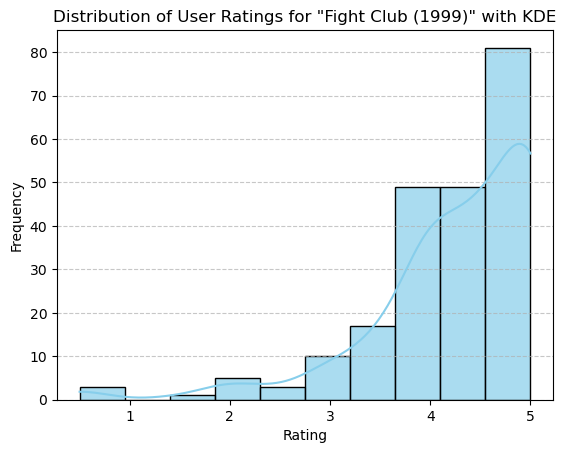

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot histogram with KDE
sns.histplot(fight_club_ratings, bins=10, kde=True, color='skyblue', edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Distribution of User Ratings for "Fight Club (1999)" with KDE')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [23]:
# Step 1: Group by movieId and calculate count and mean of ratings
movie_ratings_stats = r.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
movie_ratings_stats.rename(columns={'count': 'rating_count', 'mean': 'average_rating'}, inplace=True)

In [24]:
movie_ratings_stats

,movieId,rating_count,average_rating
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


In [25]:
# Step 2: Inner join with the movies DataFrame
movies_with_ratings = pd.merge(m, movie_ratings_stats, on='movieId', how='inner')
movies_with_ratings

,movieId,title,genres,rating_count,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000
9721,193585,Flint (2017),Drama,1,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000


In [26]:
# Step 3: Filter movies with more than 50 ratings
filtered_movies = movies_with_ratings[movies_with_ratings['rating_count'] > 50]
filtered_movies

,movieId,title,genres,rating_count,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


8) Which movie is the most popular based on  average user ratings?

In [27]:
# Find the movie with the highest average rating
most_popular_movie = filtered_movies.loc[filtered_movies['average_rating'].idxmax()]
most_popular_movie

movieId                                        318
title             Shawshank Redemption, The (1994)
genres                                 Crime|Drama
rating_count                                   317
average_rating                            4.429022
Name: 277, dtype: object

9) Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [28]:
# Sort the filtered_movies DataFrame by rating_count in descending order
top_movies_by_ratings = filtered_movies.sort_values(by='rating_count', ascending=False)
top_movies_by_ratings

,movieId,title,genres,rating_count,average_rating
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
...,...,...,...,...,...
3147,4239,Blow (2001),Crime|Drama,51,3.813725
3490,4776,Training Day (2001),Crime|Drama|Thriller,51,3.794118
3539,4848,Mulholland Drive (2001),Crime|Drama|Film-Noir|Mystery|Thriller,51,3.843137
118,145,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller,51,3.245098


In [29]:
# Select the top 5 movies
top_5_movies = top_movies_by_ratings.head(5)
top_5_movies

,movieId,title,genres,rating_count,average_rating
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


10) Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [30]:
#Filter Sci-Fi movies
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi', case=False, na=False)]
sci_fi_movies

,movieId,title,genres,rating_count,average_rating
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,177,3.983051
133,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
145,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355
176,208,Waterworld (1995),Action|Adventure|Sci-Fi,115,2.913043
...,...,...,...,...,...
7675,89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,69,3.869565
7749,91500,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,54,3.435185
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [31]:
num_sci_fi_movies = sci_fi_movies.shape[0]
num_sci_fi_movies

88

In [32]:
# Ensure there are at least 3 Sci-Fi movies
if num_sci_fi_movies >= 3:
    # Sort Sci-Fi movies by rating_count in descending order
    sci_fi_movies_sorted = sci_fi_movies.sort_values(by='rating_count', ascending=False)

    # Select the third most popular Sci-Fi movie
    third_most_popular_sci_fi = sci_fi_movies_sorted.iloc[2] 
third_most_popular_sci_fi

movieId                                        480
title                         Jurassic Park (1993)
genres            Action|Adventure|Sci-Fi|Thriller
rating_count                                   238
average_rating                                3.75
Name: 418, dtype: object

In [33]:
# Merge with links DataFrame to get IMDB URLs
movies_with_links = pd.merge(filtered_movies, l, on='movieId', how='inner')
movies_with_links

,movieId,title,genres,rating_count,average_rating,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0


In [34]:
import requests
from bs4 import BeautifulSoup
import time
import json

# Merge the datasets to get IMDB URLs
movies_with_links = pd.merge(filtered_movies, l, on='movieId', how='inner')
movies_with_links['imdb_url'] = movies_with_links['imdbId'].apply(lambda x: f"https://www.imdb.com/title/tt{x}/")

def fetch_reviews(imdb_url):
    """Fetch reviews from IMDB URL."""
    reviews = []
    try:
        response = requests.get(imdb_url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Example selector; adjust based on IMDB page structure
        review_elements = soup.find_all('span', class_='sc-16ede01-2 gkXwzn')
        reviews = [review.get_text() for review in review_elements]
    except Exception as e:
        print(f"Error fetching reviews from {imdb_url}: {e}")
    return reviews

# Scrape reviews for each movie
all_reviews = {}
for index, row in movies_with_links.iterrows():
    imdb_url = row['imdb_url']
    print(f"Fetching reviews for {row['title']} from {imdb_url}")
    reviews = fetch_reviews(imdb_url)
    all_reviews[row['title']] = reviews
    time.sleep(2)  # Avoid making too many requests too quickly

# Save reviews to a file
with open('movie_reviews.json', 'w') as f:
    json.dump(all_reviews, f, indent=4)

Fetching reviews for Toy Story (1995) from https://www.imdb.com/title/tt114709/
Fetching reviews for Jumanji (1995) from https://www.imdb.com/title/tt113497/
Fetching reviews for Grumpier Old Men (1995) from https://www.imdb.com/title/tt113228/
Fetching reviews for Heat (1995) from https://www.imdb.com/title/tt113277/
Fetching reviews for Sabrina (1995) from https://www.imdb.com/title/tt114319/
Fetching reviews for GoldenEye (1995) from https://www.imdb.com/title/tt113189/
Fetching reviews for American President, The (1995) from https://www.imdb.com/title/tt112346/
Fetching reviews for Casino (1995) from https://www.imdb.com/title/tt112641/
Fetching reviews for Sense and Sensibility (1995) from https://www.imdb.com/title/tt114388/
Fetching reviews for Ace Ventura: When Nature Calls (1995) from https://www.imdb.com/title/tt112281/
Fetching reviews for Get Shorty (1995) from https://www.imdb.com/title/tt113161/
Fetching reviews for Leaving Las Vegas (1995) from https://www.imdb.com/title

11) Mention the movieId of the movie which has the highest IMDB rating.

In [35]:
highest_rated_movie = movies_with_links.loc[movies_with_links['average_rating'].idxmax()]

# Output the movieId
highest_movie_id = highest_rated_movie['movieId']
highest_movie_id

318

12) Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [36]:
sci_fi_movies = movies_with_links[movies_with_links['genres'].str.contains('Sci-Fi')]

# Find the Sci-Fi movie with the highest average rating
highest_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['average_rating'].idxmax()]

# Output the movieId of the highest-rated Sci-Fi movie
highest_movie_id = highest_rated_sci_fi_movie['movieId']
highest_movie_id

260